# Data Analytic Project: E-commerce public dataset
- Name: Muhamad Insan Rahmatuloh
- Email: muhamad.insan.r@gmail.com
- Id Dicoding:

## Define Business Question

- Dimana saja kota tempat tinggal customer dan kota mana yang paling banyak, dari wilayah tsb dimana order paling banyak
- Produk apa saja yang paling banyak diorder
- Kategori produk apa saja yang memiliki skor review yang baik
- Bagaimana presentase status order
- Kategori produk yang paling banyak terjual
- Bagaimana analisis RFMnya

## Prepare for all libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import posixpath
import os
from scipy import stats

## Data Wrangling

### Gathering Data 

In [ ]:
os.environ

In [14]:
path = 'dashboard/data/E-Commerce Public Dataset/'
customers = pd.read_csv(os.path.abspath(f'{path}/customers_dataset.csv'))
order_items = pd.read_csv(os.path.abspath(f'{path}/order_items_dataset.csv'), parse_dates=['shipping_limit_date'])
order_payments = pd.read_csv(os.path.abspath(f'{path}/order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.abspath(f'{path}/order_reviews_dataset.csv'), parse_dates=['review_creation_date',
                                                                                                            'review_answer_timestamp'])
orders = pd.read_csv(os.path.abspath(f'{path}/orders_dataset.csv'), parse_dates=['order_purchase_timestamp',
                                                                                            'order_approved_at',
                                                                                            'order_delivered_carrier_date',
                                                                                            'order_delivered_customer_date',
                                                                                            'order_estimated_delivery_date'])
product_category_name_translation = pd.read_csv(os.path.abspath(f'{path}/product_category_name_translation.csv'))
products = pd.read_csv(os.path.abspath(f'{path}/products_dataset.csv'))
sellers = pd.read_csv(os.path.abspath(f'{path}/sellers_dataset.csv'))


In [15]:
def extract_data(filepath:str, date_col:list=[]):
    
    try:
        df = pd.read_csv(filepath, parse_dates=date_col)
        print('Extract completed ...!')
    
    except FileNotFoundError as err:
        print('File not found ...!', err)
    
    except Exception as err:
        print('Extract data failed ...!', err)

    return df

### Assessing Data

#### Customers

In [16]:
customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
38833,36c82ac8588030097d3f7aca9640518e,49cd19da4125cfc6418ea28ce4880f7c,13040,campinas,SP
31881,ebf28472ced6d1aaf751af1592f56df6,11c6370fa35c524098f44a6c6d0582ed,2762,sao paulo,SP
51008,19c9c76242909af3b476a8b0cb52dbf8,071151e43131464fef4e13aa9a8dee37,24358,niteroi,RJ
11644,45856349acbad3f1df3fc464e53586eb,cbff2844e9147796d9fa0b7c204c501f,28893,rio das ostras,RJ
34842,80aecbe9841e2594daf4211199cec79b,f34e9f318400ab43aece943bf7d6c6ef,13290,louveira,SP
55289,79735f2e8136ba8c16524a5bf978baf3,ab277572eca2c0ad1ce0fd8dc368bbe6,37550,pouso alegre,MG
57676,7c0db6cf652a60942237dd7237b56710,32065a4e64a3703330000641318293d1,8693,suzano,SP
15866,e04d54b5ba132b01e15cf50ccde581a6,60fa2abe7171194126ecb847281cb81e,85010,guarapuava,PR
62731,a897c59227049657ec35b6e7d03edeed,2737c3941b1bc81f8e5b636640b71ddf,4104,sao paulo,SP
14139,f42ccd297946628a53e061e56e6ae0ae,3a35072545922212963fb3df6ca15042,76821,porto velho,RO


In [17]:
customers.shape

(99441, 5)

In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation

In [19]:
# geolocation.sample(5)

In [20]:
# geolocation.shape

In [21]:
# geolocation.info()

In [22]:
# geolocation['geolocation_zip_code_prefix'] = pd.to_numeric(geolocation['geolocation_zip_code_prefix'])

#### Order Items

In [23]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
51248,7484cb86db28da2d4d7c3f41dc265201,1,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,2018-08-24 19:10:03,66.99,27.75
45183,66ae9e2feb2290923a0f5ee2dd22b136,1,f40876e0ef3cd5f9132b1f16b04b1346,620c87c171fb2a6dd6e8bb4dec959fc6,2018-03-29 15:05:20,119.90,49.27
77616,b0ae3c04778f1acb9c96dfef3d0357af,1,4228398e19ac96e84e14924449bac556,dd533b429f380718b70ad9922c294bae,2017-08-01 00:55:06,129.90,15.66
86969,c58280939363439540f5e35a91a5e296,1,07e1dae59ffce9e47d0f529361d492f6,430315b7bb4b6e4b3c978f9dfa9b0558,2018-08-15 10:31:41,349.00,88.33
9839,168bda17add369de7d250129f41c6fb2,1,6848854ba286220d5450296fa28f9099,9dda5bbacd45e18d6485fee649205d09,2018-02-27 13:51:09,99.90,38.54


In [24]:
order_items.shape

(112650, 7)

In [25]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [26]:
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


<Axes: ylabel='Count'>

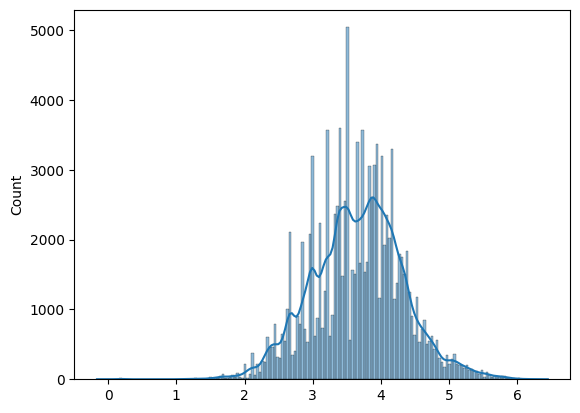

In [27]:
normal_price = stats.boxcox(order_items.price)
sns.histplot(normal_price[0],  kde=True)

#### Order Payments

In [28]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
63051,fd0bec7902ba3d0b3a658291cdfd1a40,1,credit_card,10,133.76
83333,545c329642c609a7e1e3ab759eed9dc5,1,voucher,1,132.13
7146,c679e1baef76a7cf123dc697fe11c7ad,1,credit_card,8,107.78
13482,6a18a1eddac5656cac7e8bc4f06562c2,1,credit_card,1,28.75
16907,214e3e63d08a54a0670daa8ce72df870,1,boleto,1,180.33


In [29]:
order_payments.shape

(103886, 5)

In [30]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [32]:
order_payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

#### Orders Reviews

In [33]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
21898,c8aa80ce5db16def531c812c22e86373,6f8b0c86311ec8c9e1558eff54965728,1,é uma merda,bem comprei um produto que custava 261.00 reai...,2018-06-20,2018-06-21 13:52:34
28166,733608b355581c3668cefd6d283180cb,237ad2054a0b3375cc64b6a7e6e08683,2,obrigado produto bom,"bom produto , vou ainda fazer o teste da lavag...",2018-06-12,2018-06-13 16:45:02
62099,3875e3a45401a1d28cd6f3514c09db27,6145ff8dca32adeb820e1405c8483bdf,1,NaN,NaN,2018-03-22,2018-03-22 09:21:13
12451,66a489e74be1624739378292e848ae5f,2fcd7fa5d8729fd6dddd51369b36edcd,1,NaN,Espero receber o mais rápido possível a minha ...,2018-03-23,2018-03-26 08:37:50
2929,8ecb7a05b4778f8cee0870d1e05d8768,a78de2cc0d6bc691e86e944979c373eb,5,NaN,Excelente!!!,2017-08-02,2017-08-02 23:30:24


In [34]:
order_reviews.shape

(99224, 7)

In [35]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [36]:
order_reviews.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


#### Orders

In [37]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
56857,1ca9b19a39f0b18a4a1470eba6eb5cda,39003dbbc1288a363449f30527539286,delivered,2017-05-20 11:04:54,2017-05-20 11:15:20,2017-05-22 14:33:45,2017-05-29 10:22:39,2017-06-23
70546,242bcea719638feb8c102d38e67a4977,8db4bdf985764f1587a5a06107a28d1b,delivered,2017-11-26 08:26:42,2017-11-26 08:34:32,2017-11-28 02:22:06,2017-12-19 17:54:32,2017-12-15
54599,2ad2d3393253922f6f46941e23089bf0,fb61c3e862c5b609f053cc4717391c58,delivered,2018-08-15 14:04:01,2018-08-15 14:35:20,2018-08-17 12:04:00,2018-08-28 03:33:26,2018-09-04
92785,a2ff044ec5d43bc7a284932e85a15049,6c29b231dbfcd73093d8c2fd1984e40f,delivered,2018-01-03 14:20:18,2018-01-03 14:47:02,2018-01-08 20:49:15,2018-01-10 18:39:28,2018-01-19
46569,7c65969e2451dfffe9537d696472390e,d1d81a8e87c0ba381cd13f2d8c4413f1,delivered,2018-02-21 12:23:15,2018-02-21 12:35:17,2018-02-22 23:33:06,2018-02-27 22:48:32,2018-03-14


In [38]:
orders.shape

(99441, 8)

In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [40]:
cols = ['order_purchase_timestamp','order_delivered_carrier_date','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']

for c in cols:
    orders[c] = pd.to_datetime(orders[c])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [41]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Product Category Name Translation

In [42]:
product_cat_name.sample(5)

NameError: name 'product_cat_name' is not defined

In [ ]:
product_cat_name.shape

(71, 2)

In [ ]:
product_cat_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Products

In [ ]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21859,28b4eced95a52d9c437a4caf9d311b95,moveis_decoracao,60.0,1953.0,1.0,750.0,69.0,11.0,11.0
12339,3591b4602bb8316dd178c98a97c29454,utilidades_domesticas,28.0,308.0,2.0,1650.0,35.0,30.0,15.0
24119,0688d52e92d927814617e26d7702df10,perfumaria,30.0,238.0,2.0,133.0,21.0,12.0,19.0
24572,bed9b7934576c9ba61b6ba6f3babc698,brinquedos,59.0,814.0,2.0,1400.0,35.0,28.0,16.0
30536,5e9f7e47bbd1cf91d9a98ed9fdaf6193,ferramentas_jardim,59.0,406.0,2.0,1050.0,40.0,6.0,22.0


In [ ]:
products.shape

(32951, 9)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products[products.product_id == '1fbeaaa01377d3f600de52f455ef578c']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11975,1fbeaaa01377d3f600de52f455ef578c,cama_mesa_banho,55.0,664.0,1.0,2800.0,44.0,10.0,34.0


#### Sellers

In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.shape

(3095, 4)

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# sellers.zip_code_prefix.value_counts().head(10)

### Cleaning Data

In [ ]:
# change data type on Order Items of shipping_limit_date to date
order_items.shipping_limit_date = pd.to_datetime(order_items['shipping_limit_date'])

# change data type on order review of the review_creation_date and review_answer_timestamp to date 
order_reviews.review_creation_date = pd.to_datetime(order_reviews.review_creation_date)
order_reviews.review_answer_timestamp = pd.to_datetime(order_reviews.review_answer_timestamp)

# change data type on Orders of the order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, 
# order_delivered_customer_date, order_estimated_delivery_date to date 
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp.str.strip())
orders.order_approved_at = pd.to_datetime(orders.order_approved_at.str.strip())
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date.str.strip())
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date.str.strip())
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date.str.strip())


In [ ]:
# cleaning null value on Orders dataset (99441, 8)
# orders.isnull().sum()
# orders.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

# cleaning null value on Products dataset (32951, 9)
# products.isnull().sum()
# products.dropna(inplace=True)

In [ ]:
print(f'order {orders.shape} & products {products.shape}')

order (99441, 8) & products (32951, 9)


## Exploratory Data Analysis (EDA)

#### Explore Customer

In [ ]:
customers[customers.customer_state == 'CE']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE
103,126cf4e9fd189d2d64bc9b112fd6a5e8,90d479448b39ad9586d05da64cfb695b,62016,sobral,CE
303,3aec4688b93d6061ec5061721ad493a7,7b0cae22ae2b6cf88163a50600da4ee2,60181,fortaleza,CE
422,522a6e7c1f1f992ac81be6abefa46294,282ebddb3e85120b1652204758fc332b,60055,fortaleza,CE
...,...,...,...,...,...
99072,18e56af97c2f24afcfaf7aa97ad2b969,d9ff7e37d7bf448abb783a6e56462d93,63765,sucesso,CE
99171,3218724bc18c442e58bd39608b0f100a,d9151698fc7193669598995a4c6f494f,62800,aracati,CE
99328,1e03a2aa5714007700c8e727849cf123,54a2d9cbeb08a11268085529cfe2524f,60440,fortaleza,CE
99343,9289d8bcd95805bc1ac27c949a99da98,ec8aaeb3869352e348097f26f4c49ee3,60864,fortaleza,CE


In [ ]:
custby_city_states = customers.groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(by='customer_id', ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})
custby_city_states.head()

,customer_city,jml_cust
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [44]:
custby_states = customers.groupby(by=['customer_state']).customer_id.nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'customer_id':'jml_cust'})
custby_states.sample(3)

,customer_state,jml_cust
25,AP,68
10,PE,1652
15,MS,715


#### Explore Order

In [ ]:
order_items.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
38709,57ee82f12deff0a89b3429c8fc1b4bb0,1,6085250f7b172d15b2fd69b85ca4808e,96493fab2fbb13a14d0c0e8772eef5c3,2017-06-27 13:50:17,339.00,44.72
84226,bf5bcd59f69c6840dc0f1d9732abf47d,2,2b7aa376a6e728560bddb5558cc48e89,7c67e1448b00f6e969d365cea6b010ab,2018-03-25 22:28:12,116.99,18.70
79105,b3f55c2eb15cabe65b19af738e82b37d,1,d285360f29ac7fd97640bf0baef03de0,b33e7c55446eabf8fe1a42d037ac7d6d,2017-11-24 12:07:06,348.79,17.19


In [ ]:
orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
53552,badff059f06914594e6477d1273478db,5fd0bf8a4bd7c3765f1f68324dcb2871,delivered,2017-05-06 13:20:39,2017-05-07 16:05:09,2017-05-10 09:53:42,2017-05-15 13:23:52,2017-06-02 00:00:00
83105,4b9240819fa4326d73e1786751d5424f,9eb92c9d7e06ca3bbc297b173d40ca56,delivered,2017-11-28 14:59:40,2017-11-28 15:19:42,2017-12-04 20:23:23,2018-01-09 12:13:00,2017-12-29 00:00:00


In [45]:
orders['delivery_time'] = (orders.order_delivered_customer_date - orders.order_approved_at).dt.days
# del_time.apply(lambda x: x.total_seconds())/86400
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99281,97658,96476,99441,96462.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,11.642968
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-7.000000
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.000000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,9.000000
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,208.000000
std,NaN,NaN,NaN,NaN,NaN,9.520747


In [46]:
orders_items = pd.merge(left=orders, right=order_items, on='order_id', how='inner')
orders_items['total_price'] = orders_items.order_item_id * orders_items.price
orders_items.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
7140,2beef95c5b98fdfefddc581a17f27b82,acff1dd156a7586a29ca75cb9ede443b,delivered,2017-12-11 14:52:04,2017-12-11 14:59:23,2017-12-16 01:13:28,2018-01-03 23:38:33,2018-01-16,23.0,1,a2a1d57880bb40e60b59530ba0177ccf,6fd52c528dcb38be2eea044946b811f8,2017-12-28 14:59:23,58.67,15.17,58.67
48741,11112c53dc1c411e991ae06fafeef392,e50e1d62ee7e61dc8bc6fc13a772acb0,delivered,2018-06-25 21:19:06,2018-06-27 08:11:31,2018-06-28 14:54:00,2018-07-04 14:52:38,2018-07-20,7.0,1,3c9ddb88ecde498679b5c3b5f9b0a213,70126eecc6aa1274392a1743866e9678,2018-07-03 03:32:04,38.80,18.37,38.80
81456,63b560062bb9ccde4a2b9e9d26b39486,e3d372b69974946e6e31f906d16966d5,delivered,2018-08-07 13:28:15,2018-08-07 13:45:34,2018-08-08 16:04:00,2018-08-12 17:32:42,2018-08-10,5.0,1,10f2f7707444b16ab90c38797c095336,6560211a19b47992c3666cc44a7e94c0,2018-08-09 13:45:34,189.00,8.58,189.00
58283,14727b31671d412db797863b9bba8392,c190690e301a71da231b0310e61c7744,delivered,2017-06-05 18:08:08,2017-06-06 18:15:20,2017-06-07 15:01:55,2017-06-19 21:27:31,2017-07-06,13.0,1,d950ce1f38b6772552be4523baf94c7a,ebd2d60905fb58271facef5596b620d3,2017-06-12 18:15:20,74.90,19.76,74.90
93034,c7bcf14cf0fa48837a78fe5cc16b6934,7ac830df7375159599fce33ddfdca903,delivered,2018-07-11 18:11:37,2018-07-11 18:26:24,2018-07-23 11:36:00,2018-07-31 20:49:40,2018-08-08,20.0,1,1a080577618e7fe4d9ddd8fb2b47a964,2eb70248d66e0e3ef83659f71b244378,2018-07-23 18:26:24,539.00,18.87,539.00


In [47]:
orders_items_payments = pd.merge(left=orders_items, right=order_payments, on='order_id')
print(orders_items_payments.shape)
orders_items_payments.sample(3)
# world.continent.value_counts()

(117601, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
6140,422040395c164b8b5c0255af3c710646,3680a273ddb333253fa2edc7d3f8a3f2,delivered,2018-05-14 10:33:04,2018-05-14 10:52:36,2018-05-15 12:00:00,2018-05-19 10:47:43,2018-05-29,4.0,1,216bb0e0cd43ffd832e0973d35e0377e,955fee9216a65b617aa5c0531780ce60,2018-05-16 10:52:36,45.00,18.23,45.00,1,credit_card,1,6.70
69704,f3a1afc2437c5eb6c3ef3d974cf47d08,8713490761730338d44c032437698048,delivered,2017-03-27 23:51:01,2017-03-28 00:43:02,2017-03-30 10:44:57,2017-04-10 22:58:17,2017-04-18,13.0,1,d696750e550fd0f733979dd7e5dff921,9de4643a8dbde634fe55621059d92273,2017-04-03 00:43:02,169.99,16.40,169.99,1,credit_card,8,186.39
61709,7d8db373393c49a61b22e4688965988e,ad7a465c17f982816cdb4e6c5a71c58c,delivered,2018-02-02 23:14:48,2018-02-02 23:29:56,2018-02-05 23:34:16,2018-02-20 00:12:56,2018-03-05,17.0,1,de427aed54c97c0b1edbdf2ee28c7bb1,8bb48dc19fccaa8613b6229bf7f452a2,2018-02-07 23:29:56,33.00,16.11,33.00,1,credit_card,1,9.11


In [48]:
all_orders = pd.merge(left=orders_items_payments, right=order_reviews, on='order_id')
all_orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
55369,9a0b6a2c842e5a42bef91fa4c7dea9c4,e02cd9861f07833a0aa0e073527e81a8,delivered,2017-09-20 08:54:48,2017-09-21 09:04:42,2017-09-21 18:23:46,2017-10-03 12:05:29,2017-10-17,12.0,1,...,1,credit_card,4,92.65,0f78e4239d721587a2a1e81256297240,5,NaN,NaN,2017-10-04,2017-10-05 12:12:14
54538,20682401f377f9713842c128b03fc43f,dd9e543aa63df2f0c0b15dfd977f650b,delivered,2018-02-22 00:02:08,2018-02-22 00:30:06,2018-02-22 16:52:25,2018-02-28 00:56:37,2018-03-14,6.0,2,...,1,credit_card,3,333.34,8e2adab5dca29084338ceaa0b90140a5,5,NaN,NaN,2018-03-01,2018-04-10 01:53:25
107597,90275eeca491639c0cc2d4095a60b2c2,baef940a00ba067871c199dbe8212204,delivered,2018-06-23 10:49:55,2018-06-23 11:14:55,2018-06-26 11:53:00,2018-07-05 18:11:38,2018-07-26,12.0,1,...,1,credit_card,1,46.30,06aeb9d7bafde6eabbd027dfb15aae59,4,NaN,NaN,2018-07-06,2018-07-06 21:29:40


In [ ]:
all_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,1,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58


In [ ]:
cust_list = customers.customer_id.to_list()
customers['cust_status'] = orders.customer_id.apply(lambda x: "Active" if x in cust_list else "In-Active")

customers.cust_status.value_counts()

cust_status
Active    99441
Name: count, dtype: int64

#### Explore Products

In [ ]:
print(products.shape)
products.sample(3)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32632,72b95452ea4355dd9f749878759c92d0,moveis_decoracao,60.0,422.0,1.0,6200.0,52.0,18.0,35.0
14748,0c5e36ec8408cf38afb24e6dd62a19df,moveis_decoracao,36.0,182.0,1.0,550.0,30.0,30.0,30.0
32046,05a9dadb8402b6b7ae3dd28f7da187b5,informatica_acessorios,59.0,3314.0,2.0,2950.0,20.0,20.0,20.0


In [ ]:
print(product_category_name_translation.shape)
product_category_name_translation.sample(3)

(71, 2)


,product_category_name,product_category_name_english
55,fashion_roupa_feminina,fashio_female_clothing
56,eletrodomesticos_2,home_appliances_2
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture


In [50]:
products_cat_name_translation = pd.merge(left=products, right=product_category_name_translation, on='product_category_name')
print(product_category_name_translation.shape)
product_category_name_translation.sample(3)

(71, 2)


,product_category_name,product_category_name_english
14,brinquedos,toys
70,seguros_e_servicos,security_and_services
18,eletroportateis,small_appliances


#### Explore Seller

In [ ]:
# sellers.seller_city.value_counts().head(10).to_frame().reset_index().rename(columns={'count':'jumlah'})
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Merger customer, order and product

In [52]:
order_cust = pd.merge(left=all_orders, right=customers, on='customer_id')
order_seller = pd.merge(left=order_cust, right=sellers, on='seller_id')
all_dataset = pd.merge(left=order_seller, right=products_cat_name_translation, on='product_id')
print(all_dataset.shape)
all_dataset.sample(10).to_clipboard()
# df = all_dataset[['order_id', 'order_status', 'order_item_id', 'price', 'product_id', 'total_price','product_category_name', 'product_category_name_english']]
# df[df.product_category_name_english == 'bed_bath_table']

(115609, 42)


In [ ]:
all_dataset.groupby(by='product_category_name_english').agg({
    'order_id':'count',
    'order_item_id':'sum',
    'total_price':'sum'
}).reset_index().sort_values(by='order_id', ascending=False)

,product_category_name_english,order_id,order_item_id,total_price
7,bed_bath_table,11847,14608,1301396.26
43,health_beauty,9944,11368,1384414.30
65,sports_leisure,8942,10273,1119662.44
39,furniture_decor,8743,12038,969488.82
15,computers_accessories,8105,10222,1171994.41
...,...,...,...,...
3,arts_and_craftmanship,24,26,1875.90
52,la_cuisine,15,17,2330.98
11,cds_dvds_musicals,14,16,820.00
29,fashion_childrens_clothes,8,8,569.85


In [ ]:
# cities with the most order 
order_in_cities = all_dataset.groupby(by='customer_city').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})

# states with the most order 
order_in_states = all_dataset.groupby(by='customer_state').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})


# order_in_cities.head()

In [ ]:
all_dataset['order_date'] = all_dataset["order_purchase_timestamp"].dt.strftime('%Y-%m-%d')

In [ ]:
all_dataset.to_csv('dashboard/data/all_dataset.csv', index=False)

In [ ]:
all_data = all_dataset[(all_dataset["order_purchase_timestamp"] >= '2017-01-01') & (all_dataset["order_purchase_timestamp"] <= '2017-12-31')]
# all_data.info()

data = pd.read_csv('dashboard/data/all_dataset.csv', sep=',', parse_dates=['order_purchase_timestamp'])
# data.info()

def rfm_analysis(df):
    df1 = df.groupby(by='customer_id', as_index=False).agg({
            'order_purchase_timestamp':'max',
            'order_id':'count',
            'total_price':'sum'
        })
        
    df1.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    # - df1.max_order_timestamp.dt.date
    df1["max_order_timestamp"] = df1.max_order_timestamp.dt.date
    rcnt_date = df.order_purchase_timestamp.dt.date.max()
    df1["recency"] = df1["max_order_timestamp"].apply(lambda x: (rcnt_date - x).days)
    df1['cust_id_short'] = df1.customer_id.str.slice(start=25)

    df1.drop("max_order_timestamp", axis=1, inplace=True)

    return df1

rfm_analysis(data).sort_values(by="recency", ascending=True).head()

,customer_id,frequency,monetary,recency,cust_id_short
28446,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0,e20e8d7
6235,10a79ef2783cae3d8d678e85fde235ac,1,6.90,5,de235ac
51800,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5,9be0a8b
86225,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5,377fa02
69923,b8c19e70d00f6927388e4f31c923d785,1,169.80,5,923d785


## Visualization & Explanatory Analysis

### Pertanyaan 1: dimana saja kota tempat tinggal customer dan kota mana yang paling banyak, dari wilayah tsb dimana order paling banyak

In [ ]:
custby_states['%'] = custby_states.jml_cust/custby_states.jml_cust.sum()
custby_states.head()

,customer_state,jml_cust,%
0,SP,41746,0.419807
1,RJ,12852,0.129242
2,MG,11635,0.117004
3,RS,5466,0.054967
4,PR,5045,0.050734


In [ ]:
def cust_by_states(df):
    return df.groupby(by=['customer_state']).customer_id.nunique().sort_values(
                ascending=False).reset_index().rename(
                    columns={'customer_id':'jml_cust'})

cust_by_states(all_dataset).head()

,customer_state,jml_cust
0,SP,40536
1,RJ,12410
2,MG,11297
3,RS,5331
4,PR,4902


In [ ]:
fig = px.bar(
    custby_states, 
    x='customer_state', 
    y='jml_cust',
    title='States With The Largest Customer' )
fig.show()


In [ ]:
def cust_by_cities(df):
    return df.loc[:,['customer_city','customer_id']].groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(
            by='customer_id', 
            ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})

cust_by_cities(all_dataset).head()

,customer_city,jml_cust
0,sao paulo,18267
1,rio de janeiro,8022
2,belo horizonte,3196
3,brasilia,2434
4,curitiba,1790


In [ ]:
fig = px.bar(
    custby_city_states.head(10), 
    x='jml_cust',
    y='customer_city',
    title='Top 10 Cities With The Largest Customer',
    orientation='h',
    )
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
custby_city_states.head(10),

(           customer_city  jml_cust
 0              sao paulo     15540
 1         rio de janeiro      6882
 2         belo horizonte      2773
 3               brasilia      2131
 4               curitiba      1521
 5               campinas      1444
 6           porto alegre      1379
 7               salvador      1245
 8              guarulhos      1189
 9  sao bernardo do campo       938,)

In [ ]:
products_cat_name_translation.product_category_name_english.value_counts().to_frame().reset_index()

,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,fashion_childrens_clothes,5
68,home_comfort_2,5
69,security_and_services,2


In [ ]:
top_product_cat = all_dataset.groupby(by='product_category_name_english').agg({
    'order_id':'count'
}).sort_values(
    by='order_id', 
    ascending=False).reset_index().rename(columns={'order_id':'jumlah'})

top_product_cat.iloc[11:,].head()

,product_category_name_english,jumlah
11,cool_stuff,3964
12,perfumery,3575
13,baby,3178
14,electronics,2827
15,stationery,2607


In [ ]:
fig_seller_by_states = px.bar(
            all_dataset.seller_state.value_counts().to_frame().reset_index().rename(columns={'count':'jumlah'}).head(10), 
            x='seller_state', 
            y='jumlah',
            title='States With The Largest Sellers' )
fig_seller_by_states.show()
# st.plotly_chart(fig_seller_by_states, theme="streamlit", use_container_width=True)

### Pertanyaan 2 kategori produk apa saja yang memiliki skor review yang baik

In [ ]:
all_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_price',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'cust_status', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english']

In [ ]:
def product_review(df):
    return df.groupby(by=['review_score','product_category_name_english']).agg({'review_id':'count'}).sort_values(
        by='review_id', 
        ascending=False).rename(columns={'review_id':'jumlah'}).reset_index()

product_review(all_dataset).head()

,review_score,product_category_name_english,jumlah
0,5,bed_bath_table,6166
1,5,health_beauty,6024
2,5,sports_leisure,5284
3,5,furniture_decor,4698
4,5,computers_accessories,4347


In [ ]:
# df = px.data.tips()
# px.Constant("all")
fig = px.treemap(product_review, path=[px.Constant("Product Score Review"), 'review_score', 'product_category_name_english'], values='jumlah')
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

ValueError: DataFrame constructor not properly called!

### Pertanyaan 3: bagaimana presentase status order

In [ ]:
order = all_dataset[['order_id', 'customer_id', 'order_status']]
status_order = order.groupby(by='order_status').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).rename(columns={'order_id':'jml'}).reset_index()
status_order.head()

,order_status,jml
0,delivered,113210
1,shipped,1138
2,canceled,536
3,invoiced,358
4,processing,357


In [ ]:
fig = px.pie(status_order, values='jml', names='order_status', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
all_dataset['order_purch_month_year'] = all_dataset['order_purchase_timestamp'].dt.strftime('%m-%Y')
all_dataset['order_purch_year'] = all_dataset.loc[:,'order_purchase_timestamp'].dt.year

df2 = all_dataset.groupby(by=['order_status',
                'order_purch_month_year',
                'order_purch_year']).agg({'order_id':'count'}).reset_index().rename(columns={'order_id':'jumlah'})

# df2[(df2.order_status == ['shipped','cenceled']) & (df2.order_purch_year == 2017)]
df2[df2.order_status.isin(['shipped','cenceled']) & (df2.order_purch_year == 2017)]

# def amount_of_order_status(df, year=2017, status=['delivered','shipped']):
#     df['order_purch_month_year'] = all_dataset['order_purchase_timestamp'].dt.strftime('%m-%Y')
#     df['order_purch_year'] = all_dataset.loc[:,'order_purchase_timestamp'].dt.year

#     df2 = df.groupby(by=['order_status',
#                     'order_purch_month_year',
#                     'order_purch_year']).agg({'order_id':'count'}).sort_values(by='order_purch_month_year').reset_index().rename(columns={'order_id':'jumlah'})
    
#     return df2[(df2.order_status.isin([status])) & (df2.order_purch_year == year)]
#     # return df2[df2.order_purch_year == year]
#     # return df2


# fig = px.line(amount_of_order_status(all_dataset[all_dataset.order_purchase_timestamp > '2018-01-01']), 
#               x="order_purch_month_year", 
#               y="jumlah", 
#               color="order_status", 
#               text="jumlah",
#               title="Purchase Order by Month")
# fig.update_traces(textposition="bottom right")
# fig.show()

,order_status,order_purch_month_year,order_purch_year,jumlah
86,shipped,01-2017,2017,16
88,shipped,02-2017,2017,25
90,shipped,03-2017,2017,48
92,shipped,04-2017,2017,80
94,shipped,05-2017,2017,52
96,shipped,06-2017,2017,50
98,shipped,07-2017,2017,57
100,shipped,08-2017,2017,39
103,shipped,09-2017,2017,37
106,shipped,10-2017,2017,36


### Pertanyaan 4: kategori produk yang paling banyak terjual

In [ ]:
data = all_dataset[['order_id', 'order_status', 'order_item_id', 'product_id', 'shipping_limit_date',
                                      'price', 'freight_value', 'total_price', 'payment_sequential','payment_type', 
                                      'order_item_id','payment_installments', 'payment_value','product_category_name_english']]
print(data.shape)
data[data.order_status.isin(['delivered','shipped','invoiced'])]

rate_product = data.groupby(by=['product_category_name_english']).agg(
    {'order_id':'count'}
     ).sort_values(
         by='order_id', 
         ascending=False
         ).rename(columns={'order_id':'count'}).reset_index()

rate_product.head(5)

# sns.scatterplot(data=rate_product, x="order_id", y="price")

(115609, 14)


,product_category_name_english,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105


In [ ]:
def top_product_cat(df):
    return df.groupby(by='product_category_name_english').agg({'order_id':'count'}).sort_values(by='order_id',ascending=False).reset_index().rename(columns={'order_id':'jumlah'})

top_product_cat(all_dataset).head()                                                                                                

,product_category_name_english,jumlah
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105


In [ ]:
fig = px.treemap(rate_product, path=[px.Constant("Product Sold"), 'product_category_name_english'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Pertanyaan 5: bagaimana analisis RFMnya

In [ ]:
# all_data = pd.read_csv('dashboard/data/all_dataset.csv', 
#                        sep=',',
#                        parse_dates=['order_purchase_timestamp'])

def load_data(path_file):
    return pd.read_csv(os.path.abspath(path_file), sep=',', parse_dates=['order_date'])

path = 'dashboard/data/all_dataset.csv'
all_data = load_data(path)
data = all_data[['order_date','order_id','total_price']]

# pd.to_datetime(data['order_purchase_timestamp'])
# data['order_date'] = data["order_purchase_timestamp"].dt.strftime('%Y-%m-%d')
df1 = data[(data["order_date"] >= '2016-09-04') & (data["order_date"] <= '2018-09-03')]
df2 = data

df = pd.concat([df1, df2])
df = df.reset_index(drop=True)

df_grby = df.groupby(list(df.columns))

idx = [x[0] for x in df_grby.groups.values() if len(x) == 1]

df.reindex(idx)

# df1[df1.order_id == '54282e97f61c23b78330c15b154c867d']

,order_date,order_id,total_price


In [ ]:
print(df2[df2.order_date <= '2018-09-03'].shape)
print(df1.shape)

(115609, 3)
(115609, 3)


In [ ]:
def rfm_analysis(df):
    df1 = df.groupby(by='customer_id', as_index=False).agg({
            'order_date':'max',
            'order_id':'count',
            'total_price':'sum'
        })
        
    df1.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    # - df1.max_order_timestamp.dt.date
    df1["max_order_timestamp"] = df1.max_order_timestamp.dt.date
    rcnt_date = df.order_date.dt.date.max()
    df1["recency"] = df1["max_order_timestamp"].apply(lambda x: (rcnt_date - x).days)
    df1['cust_id_short'] = df1.customer_id.str.slice(start=25)

    df1.drop("max_order_timestamp", axis=1, inplace=True)

    return df1

    
rfm_analysis(all_data).sort_values(by="recency", ascending=True).head()

,customer_id,frequency,monetary,recency,cust_id_short
28446,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0,e20e8d7
6235,10a79ef2783cae3d8d678e85fde235ac,1,6.90,5,de235ac
51800,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5,9be0a8b
86225,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5,377fa02
69923,b8c19e70d00f6927388e4f31c923d785,1,169.80,5,923d785


In [ ]:
all_data = all_dataset[(all_dataset["order_purchase_timestamp"] >= '2017-01-01') & 
                (all_dataset["order_purchase_timestamp"] <= '2018-12-01')]
fig_recency = px.bar(
            rfm_analysis(all_data).sort_values(by="recency", ascending=True).head(), 
            y='recency',
            x='cust_id_short',
            title='By Recency (days)')

fig_recency.show()


In [ ]:
df.describe()

,frequency,monetary,recency
count,96516.000000,96516.000000,96516.000000
mean,1.197822,163.435774,244.835188
std,0.748938,381.980069,153.416102
min,1.000000,0.850000,0.000000
25%,1.000000,48.900000,120.000000
50%,1.000000,89.900000,225.000000
75%,1.000000,168.900000,355.000000
max,63.000000,60480.000000,729.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12496\582163843.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12496\582163843.py:5: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12496\582163843.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12496\582163843.py:11: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12496\582163843.py:17: FutureWarning:



Passing `palet

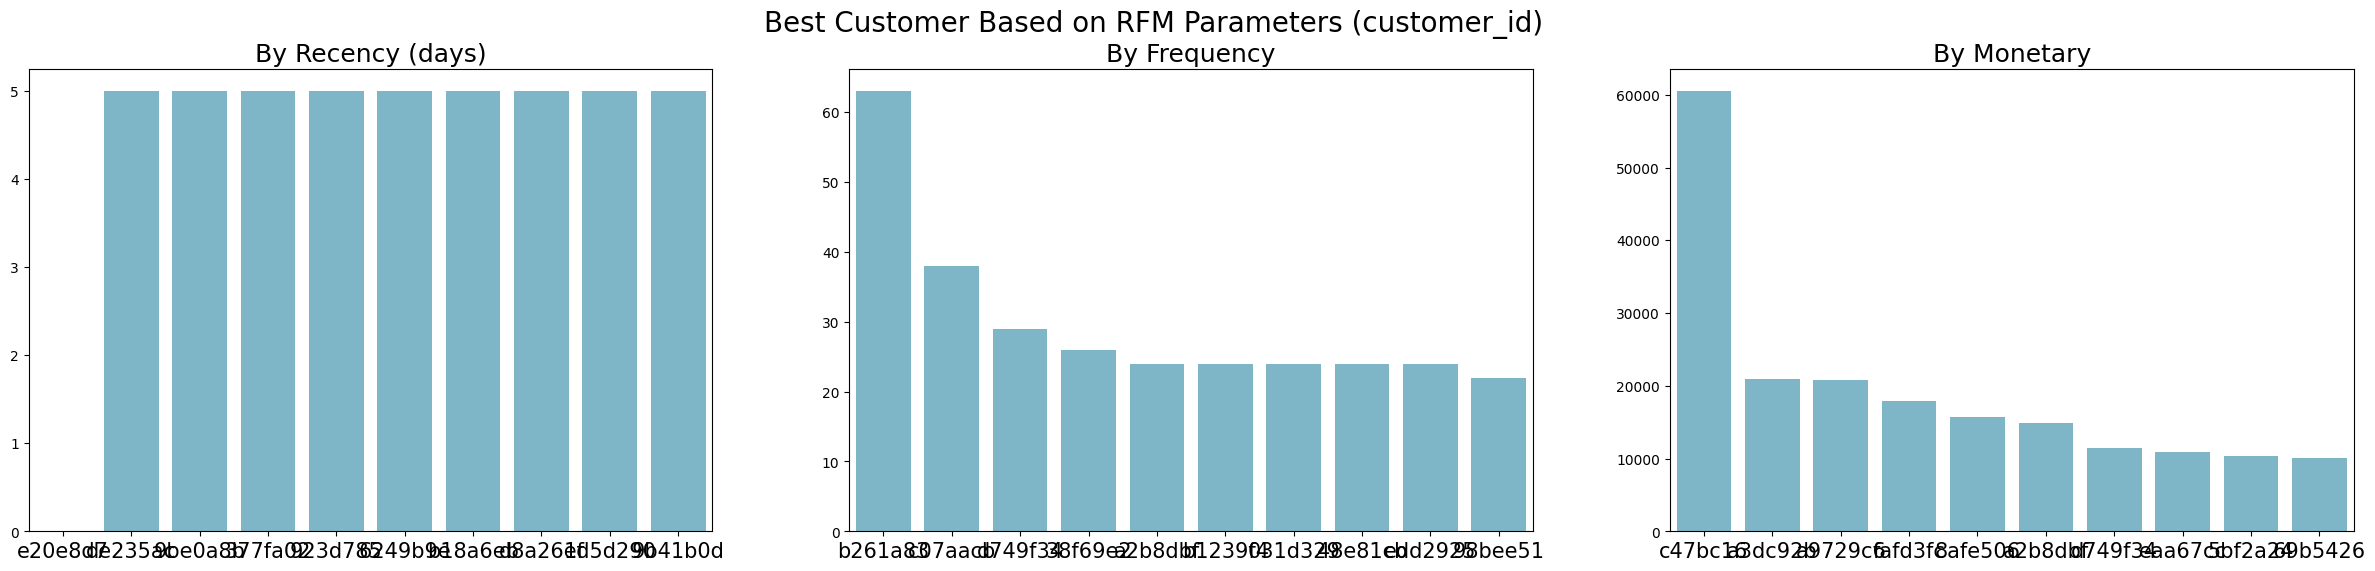

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="cust_id_short", data=rfm_analysis(all_data).sort_values(by="recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="cust_id_short", data=rfm_analysis(all_data).sort_values(by="frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="cust_id_short", data=rfm_analysis(all_data).sort_values(by="monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

<Axes: xlabel='monetary'>

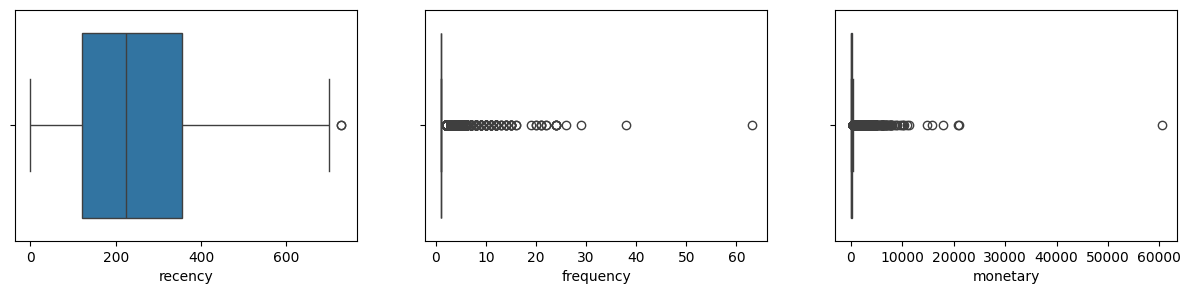

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,3))

sns.boxplot(x=df.recency, ax=ax[0])
sns.boxplot(x=df.frequency, ax=ax[1])
sns.boxplot(x=df.monetary, ax=ax[2])

## Conclusion

- Conclution pertanyaan 1
Berdasarkan visualisasi 1 dapat di simpulkan bahwa order yang paling banyak ada di state SP dan order paling banyak ada di kota sau paulo di susul rio jenario
- conclution pertanyaan 2
Berdasarkan visualisasi 2 dapat disimpulkan bahwa produk yang memiliki score review yang baik adalah bed_bath_table dan health_beauty
- conclution pertanyaan 3
Berdasarkan visualisasi 3 dapat disimpulkan bahwa 97% lebih produk terdeliver dengan baik
- conclution pertanyaan 4
Berdasarkan visualisasi 4 dapat disimpulkan bahwa kategori produk yang paling banyak terjual adalah bed_bath_table dan health_beauty
- conclution pertanyaan 5
Berdasarkan visualisasi 4 dapat disimpulkan bahwa dengan RFM analisis kita dapat mengelompokan customer berdasarkan kapan terakhir melakukan transaksi, berdasrkan seberapa sering customer melakukan transaksi dan berdasarkan revenue yang di hasilkan dari setiap customer

